In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Floresta para Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004171
O erro quadrático total foi: 2.298735
O maior erro por previsão foi: 0.466072
O erro relativo foi: 13.768830%
O número de verdadeiros negativos foi: 947
O número de verdadeiros positivos foi: 119
O número de falsos negativos foi: 34
O número de falsos positivos foi: 167
O POD foi: 0.777778
O FAR foi: 0.583916
A ACC foi: 0.841358
O kappa foi: 0.032437


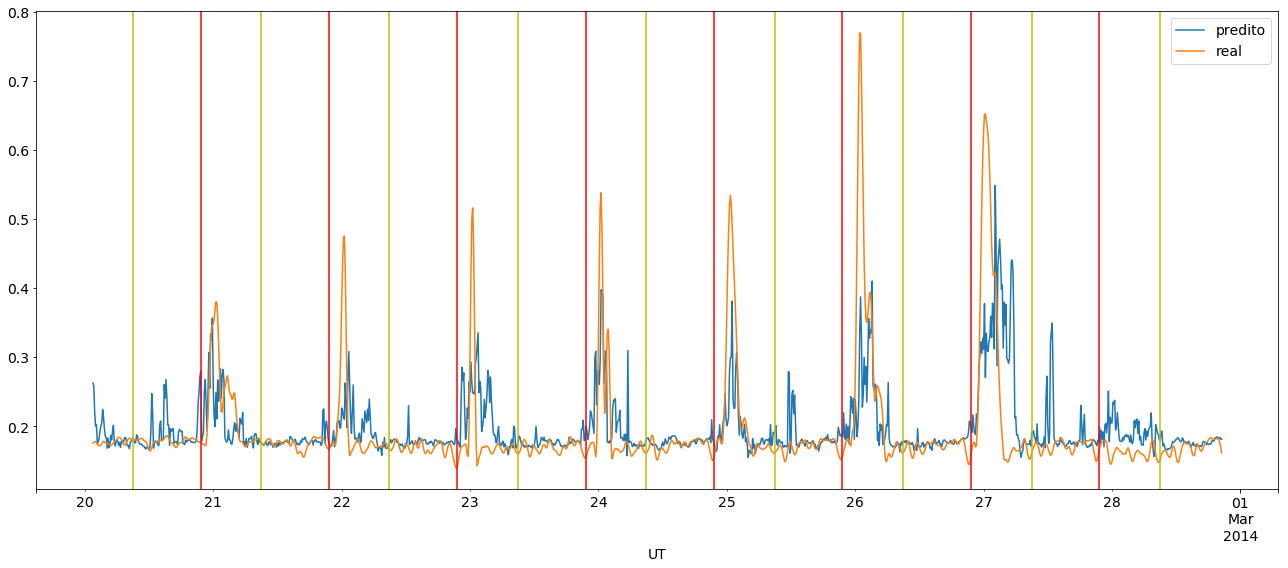

In [5]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4',
                            file_to_save_model='./images/regression_random_florest.eps')

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004372
O erro quadrático total foi: 2.353545
O maior erro por previsão foi: 0.489861
O erro relativo foi: 17.595436%
O número de verdadeiros negativos foi: 843
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 271
O POD foi: 0.797386
O FAR foi: 0.689567
A ACC foi: 0.761642
O kappa foi: 0.036875


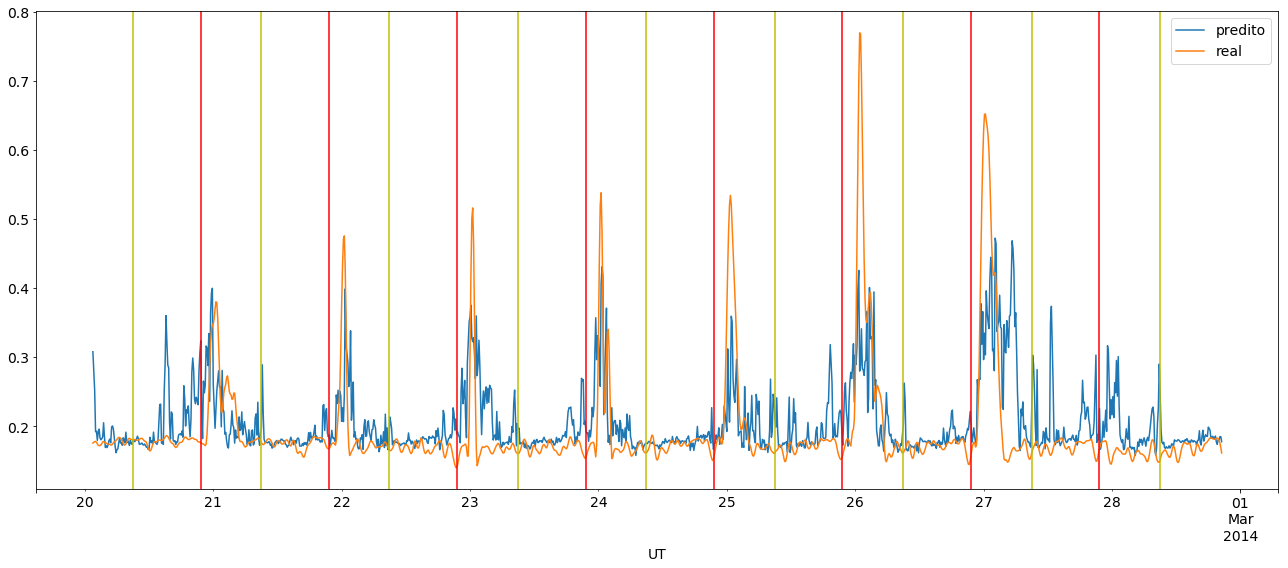

In [7]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004220
O erro quadrático total foi: 2.312424
O maior erro por previsão foi: 0.443207
O erro relativo foi: 14.471606%
O número de verdadeiros negativos foi: 936
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 178
O POD foi: 0.797386
O FAR foi: 0.593333
A ACC foi: 0.835043
O kappa foi: 0.031603


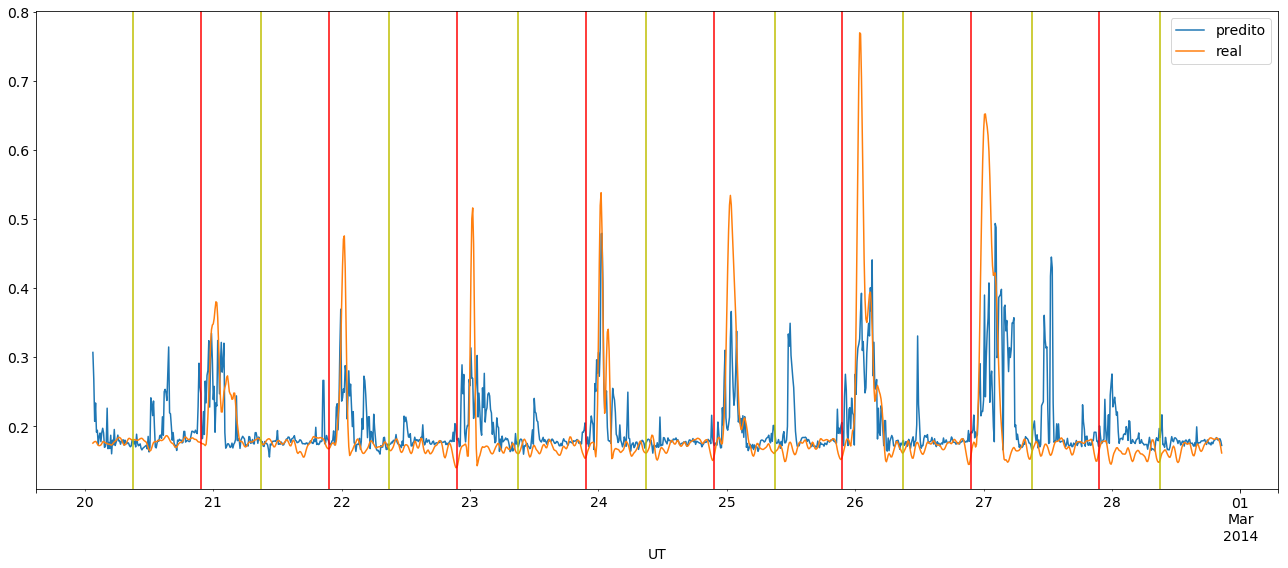

In [9]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.003839
O erro quadrático total foi: 2.205371
O maior erro por previsão foi: 0.481605
O erro relativo foi: 13.475801%
O número de verdadeiros negativos foi: 937
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 177
O POD foi: 0.816993
O FAR foi: 0.586093
A ACC foi: 0.838200
O kappa foi: 0.030126


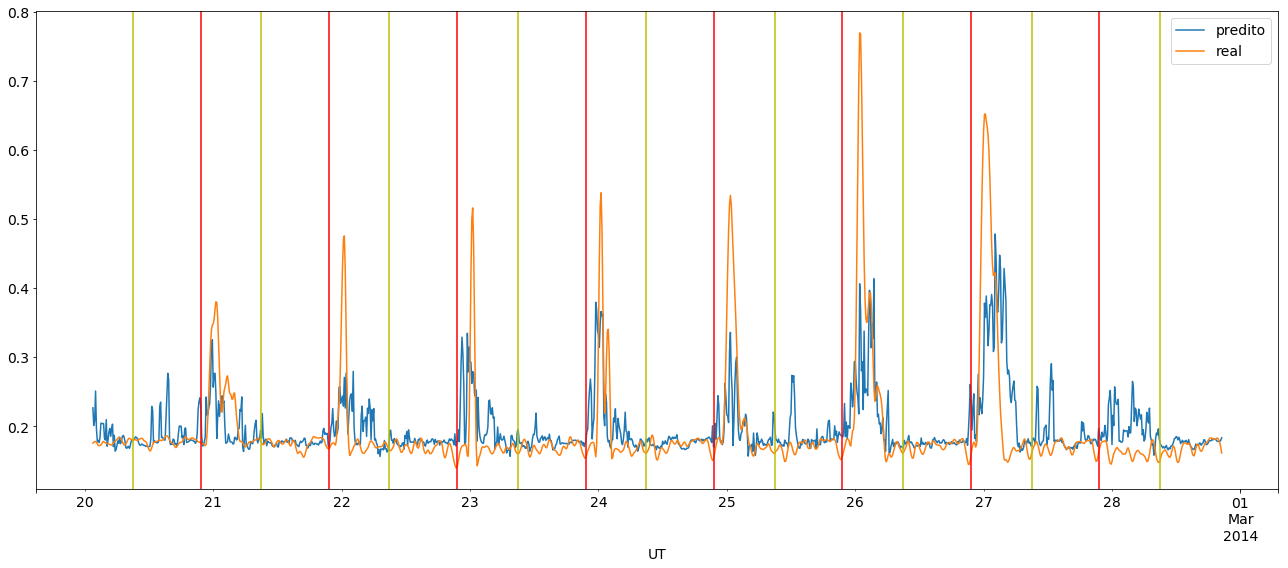

In [11]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004323
O erro quadrático total foi: 2.340290
O maior erro por previsão foi: 0.468142
O erro relativo foi: 14.525448%
O número de verdadeiros negativos foi: 918
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 196
O POD foi: 0.862745
O FAR foi: 0.597561
A ACC foi: 0.828729
O kappa foi: 0.028126


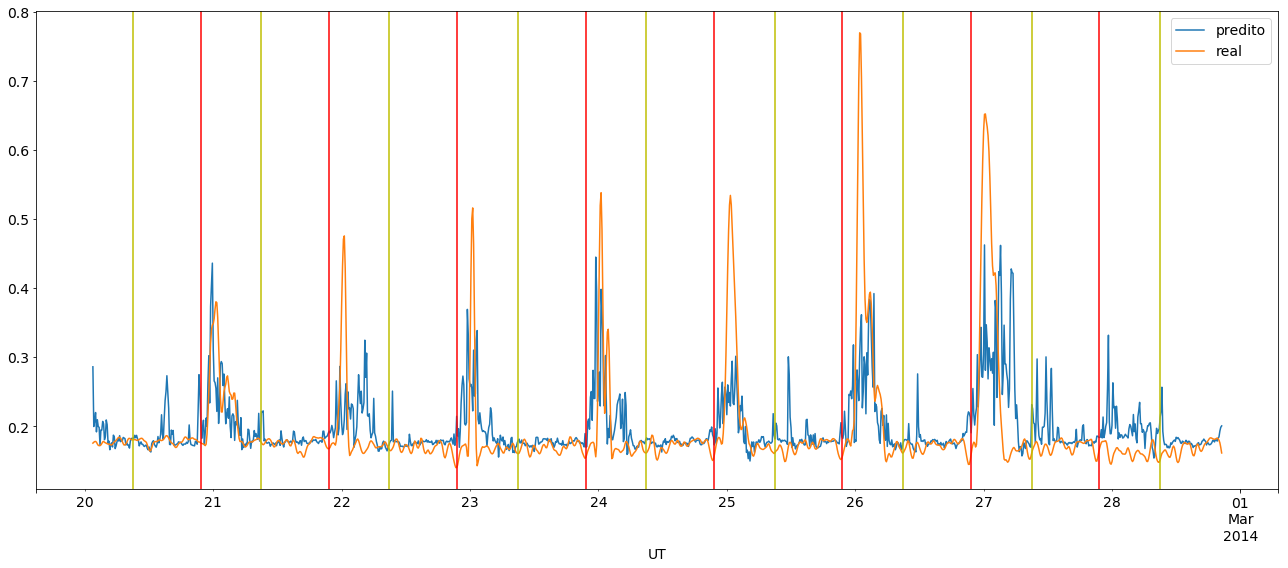

In [13]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004312
O erro quadrático total foi: 2.337356
O maior erro por previsão foi: 0.487807
O erro relativo foi: 13.142354%
O número de verdadeiros negativos foi: 959
O número de verdadeiros positivos foi: 121
O número de falsos negativos foi: 32
O número de falsos positivos foi: 155
O POD foi: 0.790850
O FAR foi: 0.561594
A ACC foi: 0.852407
O kappa foi: 0.030800


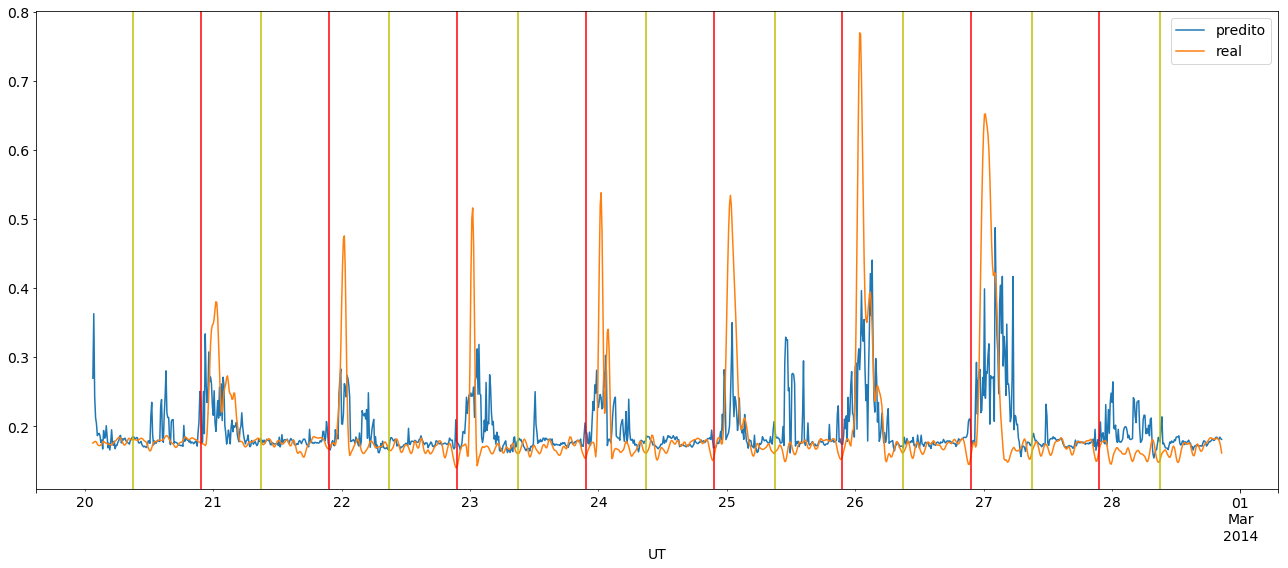

In [15]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004333
O erro quadrático total foi: 2.342995
O maior erro por previsão foi: 0.442321
O erro relativo foi: 16.156689%
O número de verdadeiros negativos foi: 866
O número de verdadeiros positivos foi: 133
O número de falsos negativos foi: 20
O número de falsos positivos foi: 248
O POD foi: 0.869281
O FAR foi: 0.650919
A ACC foi: 0.788477
O kappa foi: 0.031336


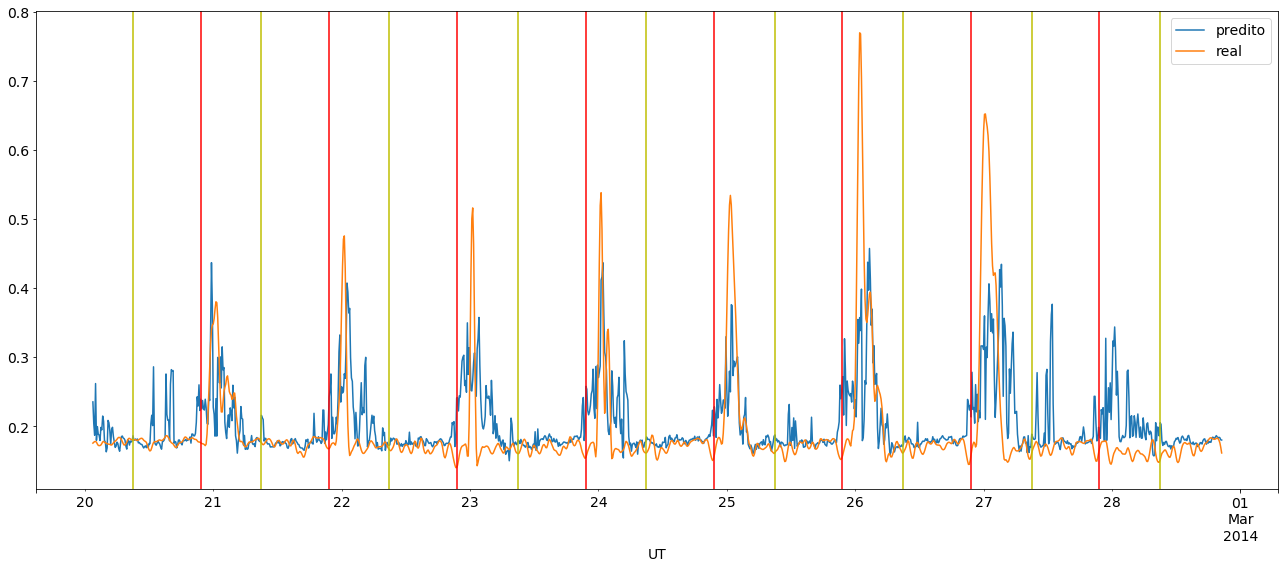

In [17]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']

Error for the time series sample:
O erro quadrático médio foi: 0.004504
O erro quadrático total foi: 2.388848
O maior erro por previsão foi: 0.536855
O erro relativo foi: 13.744170%
O número de verdadeiros negativos foi: 953
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 161
O POD foi: 0.803922
O FAR foi: 0.566901
A ACC foi: 0.849250
O kappa foi: 0.030146


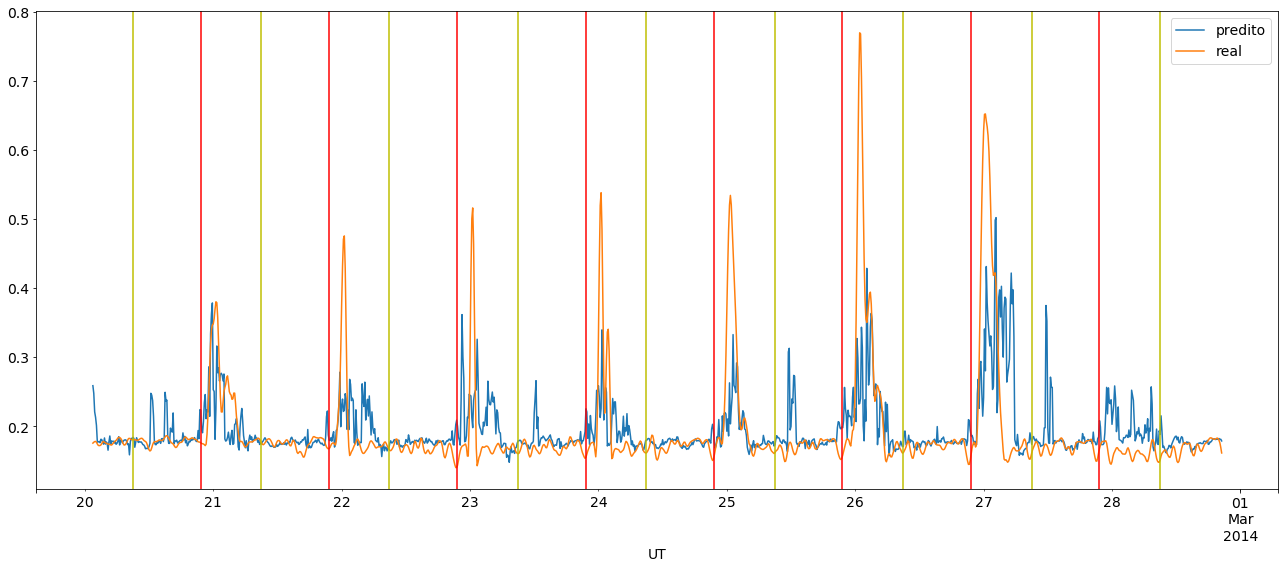

In [19]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')